<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [4]:
# Answer: 979 rows and 6 columns

In [5]:
movies.shape

(979, 6)

#### Check the data type of each column.

In [6]:
# Answer: See below

In [7]:
movies.info()

movies.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [8]:
# Answer: movie average mean is 121 mins (3sf)

In [9]:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [10]:
# Answer: Longest movie is Hamlet and shortest is Freaks

In [56]:
#Longest

movies.sort_values(by=['duration'],ascending = False).head(2)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


In [57]:
movies.sort_values(by=['duration'],ascending = False).tail(2)

,star_rating,title,content_rating,genre,duration,actors_list
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

In [13]:
# Answer: 

In [14]:
IQR=movies.duration.describe()[6]-movies.duration.describe()[4]

# Freedman-Diaconis rule H=2×IQR×𝑛−1/3

h=2*IQR/(979)**(1/3)
num_bins=(movies.duration.max()-movies.duration.min())/h

num_bins

27.616433561943236

Text(0, 0.5, 'Frequency')

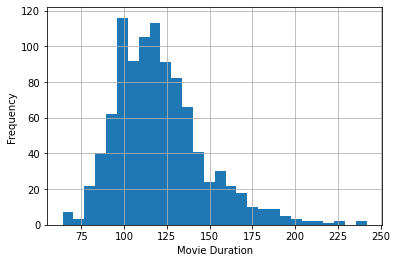

In [15]:
movies.duration.hist(bins=28)
plt.xlabel('Movie Duration')
plt.ylabel('Frequency')

#### Use a box plot to display that same data.

In [16]:
# Answer: 

<AxesSubplot:>

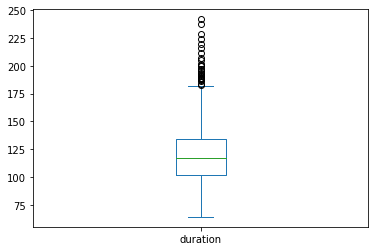

In [17]:
movies.duration.plot(kind='box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [18]:
# Answer:

In [19]:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

In [20]:
# Answer:

Text(0.5, 1.0, 'Bar Chart of Movie Genre and Count')

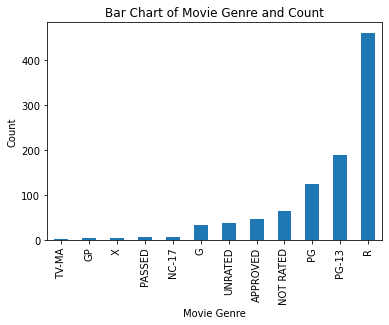

In [21]:
movies.content_rating.value_counts().sort_values(ascending=True).plot(kind='bar')

plt.xlabel('Movie Genre')
plt.ylabel("Count")
plt.title('Bar Chart of Movie Genre and Count')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [22]:
# Answer:

In [23]:
movies.content_rating.unique()

array(['R', 'PG-13', 'NOT RATED', 'PG', 'UNRATED', 'APPROVED', 'PASSED',
       'G', 'X', nan, 'TV-MA', 'GP', 'NC-17'], dtype=object)

In [24]:
movies.content_rating.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'],'UNRATED',inplace=True)

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [25]:
# Answer:

In [26]:
movies.content_rating.replace(['X', 'TV-MA'],'UNRATED',inplace=True)

#### Count the number of missing values in each column.

In [27]:
# Answer: content rating has 3 rows that is empty

In [28]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [29]:
# Answer:

In [30]:
movies[movies.content_rating.isnull()==True]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [31]:
movies.content_rating.fillna('UNRATED',inplace=True)

#movies[movies.content_rating.isnull()==True]

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [32]:
# Answer: Longer movie has higher rating

In [33]:
#Avg of movies >=2hrs

movies[movies.duration>=120].star_rating.mean()

7.948898678414082

In [34]:
#Avg of movies <=2hrs

movies[movies.duration<=120].star_rating.mean()

7.8384898710865345

#### Use a visualization to detect whether there is a relationship between duration and star rating.

In [35]:
# Answer: weak positive

<AxesSubplot:xlabel='duration', ylabel='star_rating'>

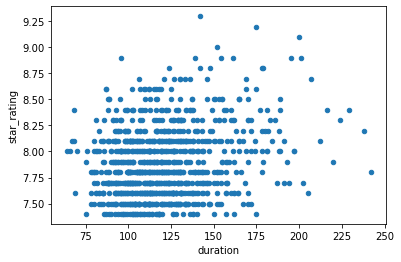

In [36]:
movies.plot(kind='scatter',x='duration',y='star_rating')

#### Calculate the average duration for each genre.

In [37]:
# Answer:

In [38]:
movies.groupby(['genre'])['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

In [39]:
# Answer:

<AxesSubplot:title={'center':'duration'}, xlabel='content_rating'>

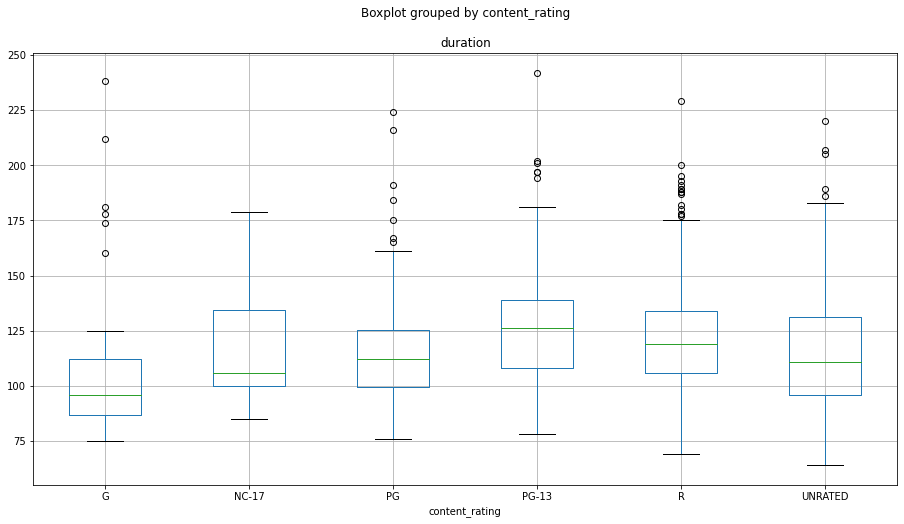

In [40]:
movies.boxplot(column='duration',by='content_rating',figsize=(15,8))

In [41]:
movies.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

#### Determine the top rated movie (by star rating) for each genre.

In [42]:
# Answer:

In [43]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [44]:
movies.groupby(['genre','star_rating'],as_index=False)['title'].count().sort_values(by='star_rating',ascending=False)


#df.groupby(["marital",'education'],as_index=False)['target'].mean().sort_values(by='target').tail(1)

,genre,star_rating,title
89,Crime,9.3,1
88,Crime,9.2,1
87,Crime,9.1,1
15,Action,9.0,1
149,Western,8.9,1
...,...,...,...
113,Horror,7.4,1
72,Crime,7.4,4
123,Mystery,7.4,1
90,Drama,7.4,12


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [45]:
# Answer: No becuase different actor different duration

In [46]:
movies[movies.duplicated(subset=['title'],keep=False)].sort_values(by='title')

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [47]:
# Answer:

In [48]:
#filter_df=pd.DataFrame(movies.genre.value_counts().reset_index()).loc[:,'index']

filter_df=pd.DataFrame(movies.genre.value_counts().reset_index())
filter_df

,index,genre
0,Drama,278
1,Comedy,156
2,Action,136
3,Crime,124
4,Biography,77
5,Adventure,75
6,Animation,62
7,Horror,29
8,Mystery,16
9,Western,9


In [49]:
filtered_list=[]

for i in range(filter_df.shape[0]):
    if filter_df.loc[i,'genre']>=10:
        filtered_list.append(filter_df.loc[i,'index'])
        
filtered_list


['Drama',
 'Comedy',
 'Action',
 'Crime',
 'Biography',
 'Adventure',
 'Animation',
 'Horror',
 'Mystery']

In [50]:
df_movie_new=movies[movies.genre.isin(filtered_list)]
df_movie_new.groupby(['genre'])['star_rating'].mean().sort_values(ascending=False)

genre
Mystery      7.975000
Adventure    7.933333
Crime        7.916935
Animation    7.914516
Drama        7.902518
Action       7.884559
Biography    7.862338
Comedy       7.822436
Horror       7.806897
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [51]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [52]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [53]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!